In [21]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# Включение русского языка
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex',preamble='\\usepackage[russian]{babel}')

In [22]:
dp = 0.5*1e+5
h  = 0.005
L = 10
mu = 1004e-6

a=0.005
b=0.005


<IPython.core.display.Javascript object>


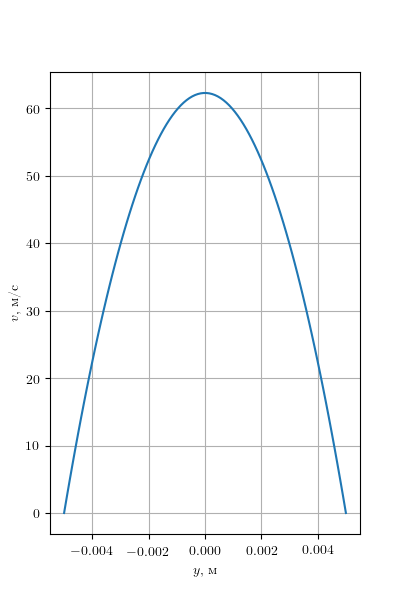

In [23]:
%matplotlib notebook

def v(y):
    return dp/L * h**2/2/mu * (1 - (y/h)**2)


fig, ax = plt.subplots(1,1,figsize=(4,6))

y = np.linspace(-h,h, num=100)

vy = v(y)

ax.plot(y,vy)

ax.grid(True)

ax.set_xlabel("$y$, м")
ax.set_ylabel("$v$, м/с")

plt.savefig("../img/Poiseuille_flat.pdf")

In [ ]:
%matplotlib notebook

def v(x,y):
    return dp/2/L/mu * a**2 *b**2 /(a**2+b**2) * (1-(x/a)**2-(y/b)**2)


fig, ax = plt.subplots(1,1,figsize=(4,6))

y = np.linspace(-h,h, num=100)


vy = v(y)

ax.plot(y,vy)

ax.grid(True)

ax.set_xlabel("$y$, м")
ax.set_ylabel("$v$, м/с")

plt.savefig("../img/Poiseuille_ellipse.pdf")